In [2]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

from string import ascii_lowercase

In [3]:
K = 28
L = 6
X = ((K * L * 23) % 20) + 1
Y = ((X + ((K * 5 + L * 7) % 19)) % 20) + 1

In [4]:
def get_data(num):
  # Nacti text ze souboru
  with open("data/" + str(num).zfill(3) + ".txt") as f:
    lines = f.readlines()
    text = lines[1].replace(" ", "")
    words = lines[1].split()

  # Spocitej cetnosti jednotlivych
  # delek
  word_f = dict()
  for word in words:
    key = len(word)
    if key in word_f.keys():
      word_f[key] += 1
    else:
      word_f[key] = 1
  word_f = dict(sorted(word_f.items()))
  
  # Spocitej pravdepodobnosti jako
  # podil cetnosti dane delky
  # a celkoveho poctu slov
  word_p = dict.fromkeys(word_f.keys())
  for length in word_p.keys():
    word_p[length] = word_f[length] / len(words)

  # Spocitej cetnosti jednotlivych
  # symbolu (bez mezery)
  char_f = dict.fromkeys(ascii_lowercase, 0)
  for symbol in text:
    char_f[symbol] += 1

  # Spocitej pravdepodobnosti jako
  # podil cetnosti daneho znaku
  # a celkoveho poctu znaku
  char_p = dict.fromkeys(ascii_lowercase)
  for symbol in char_p.keys():
    char_p[symbol] = char_f[symbol] / len(text)

  return words, word_f, word_p, char_f, char_p

In [5]:
def get_exp_val(p, exponent):
  exp_val = 0
  for key, val in p.items():
    exp_val += (key ** exponent) * val
  return exp_val

In [6]:
def get_var(p):
  return get_exp_val(p, 2) - get_exp_val(p, 1) ** 2

In [7]:
def show_probabilities(d, title):
  x = np.array(list(d.keys()))
  y = np.array(list(d.values()))

  plt.subplots(figsize = (12, 6))
  plt.title(title, fontweight = "bold", fontsize = 15)
  plt.bar(x, y)
  plt.show()

In [8]:
def show_results_table(title_1, title_2, title_3, f, p, w, h):
  fig = go.Figure(data = [
    go.Table(
      header = dict(
        align = "center",
        fill_color = "lightgrey",
        font_color = "black",
        font_size = 15,
        height = 30,
        line_color = "black",
        values = [
          "<b>" + title_1 + "</b>",
          "<b>" + title_2 + "</b>",
          "<b>" + title_3 + "</b>"
        ],
      ),
      cells = dict(
        align = "center",
        fill_color = "white",
        font_color = "black",
        font_size = 15,
        height = 30,
        line_color = "black",
        values = [
          list(f.keys()),
          list(f.values()),
          [format(val, ".7f") for val in p.values()],
        ],
      )
    )
  ])
  fig.update_layout(width = w, height = h)
  fig.show()

Střední hodnota: 4.0101852
Rozptyl: 4.4471185


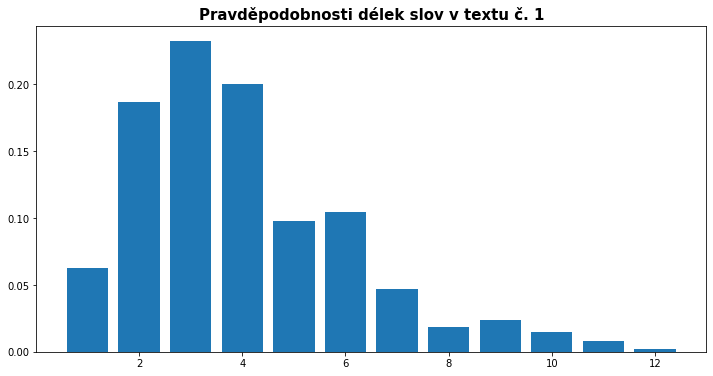

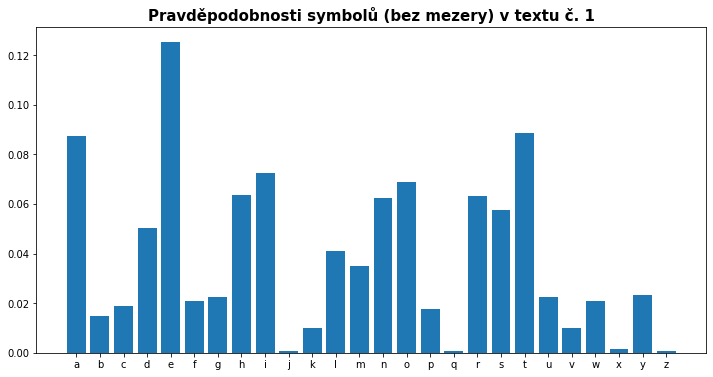

In [9]:
# Ziskej cetnosti a pravdepodobnosti
words_x, word_f_x, word_p_x, char_f_x, char_p_x = get_data(X)

# Ziskej stredni hodnotu
exp_val_x = get_exp_val(word_p_x, 1)

# Ziskej rozptyl
var_x = get_var(word_p_x)

print("Střední hodnota:", format(exp_val_x, ".7f"))
print("Rozptyl:", format(var_x, ".7f"))

show_probabilities(word_p_x, "Pravděpodobnosti délek slov v textu č. 1")
show_results_table("Délka", "Četnost", "Pravděpodobnost", word_f_x, word_p_x, 900, 600)

show_probabilities(char_p_x, "Pravděpodobnosti symbolů (bez mezery) v textu č. 1")
show_results_table("Symbol", "Četnost", "Pravděpodobnost", char_f_x, char_p_x, 900, 1000)

Střední hodnota: 4.2834646
Rozptyl: 5.0692541


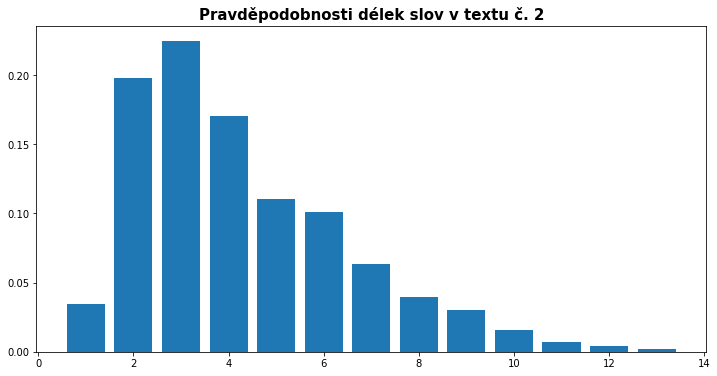

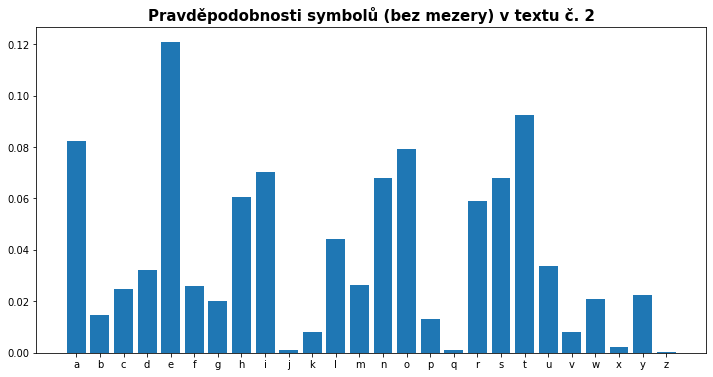

In [10]:
# Ziskej cetnosti a pravdepodobnosti
words_y, word_f_y, word_p_y, char_f_y, char_p_y = get_data(Y)

# Ziskej stredni hodnotu
exp_val_y = get_exp_val(word_p_y, 1)

# Ziskej rozptyl
var_y = get_var(word_p_y)

print("Střední hodnota:", format(exp_val_y, ".7f"))
print("Rozptyl:", format(var_y, ".7f"))

show_probabilities(word_p_y, "Pravděpodobnosti délek slov v textu č. 2")
show_results_table("Délka", "Četnost", "Pravděpodobnost", word_f_y, word_p_y, 900, 625)

show_probabilities(char_p_y, "Pravděpodobnosti symbolů (bez mezery) v textu č. 2")
show_results_table("Symbol", "Četnost", "Pravděpodobnost", char_f_y, char_p_y, 900, 1000)

In [11]:
alpha = 0.05

# Data
x = np.array(list(map(len, words_x)))
y = np.array(list(map(len, words_y)))

# Pocet prvku
n, m = len(x), len(y)

# Vyberove prumery
X_n, Y_m = np.mean(x), np.mean(y)

# Vyberove rozptyly
s_X2, s_Y2 = np.var(x, ddof = 1), np.var(y, ddof = 1)

s_d = np.sqrt(s_X2 / n + s_Y2 / m)
n_d = (s_d ** 4) / (((s_X2 / n) ** 2) / (n - 1) + ((s_Y2 / m) ** 2) / (m - 1))

# Testova statistika
T = (X_n - Y_m) / s_d

# Kriticka hodnota
t = st.t.isf(alpha / 2, n_d)

print("T =", format(T, ".7f"))
print("Kritická hodnota:", format(t, ".7f"))

T = -3.0334052
Kritická hodnota: 1.9609843


In [12]:
p_3 = st.chi2.sf(26.7009136, 10)
print("P-hodnota (3. úloha):", format(p_3, ".7f"))

p_4 = 2 * st.t.sf(np.abs(T), n_d)
print("P-hodnota (4. úloha):", format(p_4, ".7f"))

p_5 = st.chi2.sf(61.02053741, 23)
print("P-hodnota (5. úloha):", format(p_5, ".7f"))

P-hodnota (3. úloha): 0.0029035
P-hodnota (4. úloha): 0.0024448
P-hodnota (5. úloha): 0.0000272
